In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
train

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [16]:
# Data Cleaning
train['Browser_Used'] = train['Browser_Used'].replace('Chrome', 'Google Chrome')
train['Browser_Used'] = train['Browser_Used'].replace('Mozilla', 'Firefox')
train['Browser_Used'] = train['Browser_Used'].replace('Mozilla Firefox', 'Firefox')
train['Browser_Used'] = train['Browser_Used'].replace('IE', 'Internet Explorer')
train['Browser_Used'] = train['Browser_Used'].replace('InternetExplorer', 'Internet Explorer')

# Doing the same for the test set
test['Browser_Used'] = test['Browser_Used'].replace('Chrome', 'Google Chrome')
test['Browser_Used'] = test['Browser_Used'].replace('Mozilla', 'Firefox')
test['Browser_Used'] = test['Browser_Used'].replace('Mozilla Firefox', 'Firefox')
test['Browser_Used'] = test['Browser_Used'].replace('IE', 'Internet Explorer')
test['Browser_Used'] = test['Browser_Used'].replace('InternetExplorer', 'Internet Explorer')

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Label'] = label_encoder.fit_transform(train['Is_Response'])

# Since the label encodeer is labeled "not happy" as 1 and "happy" as 0, we need to reverse it
train['Label'] = 1 - label_encoder.fit_transform(train['Is_Response'])

train

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Label
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0
2,id10328,I booked this hotel through Hotwire at the low...,Firefox,Tablet,not happy,0
3,id10329,Stayed here with husband and sons on the way t...,Internet Explorer,Desktop,happy,1
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0
...,...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy,1
38928,id49254,The only positive impression is location and p...,Internet Explorer,Mobile,not happy,0
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy,0
38930,id49256,The experience was just ok. We paid extra for ...,Google Chrome,Desktop,not happy,0


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [24]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(train['Description'])

In [30]:
y = train['Label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      2452
           1       0.85      0.96      0.90      5335

    accuracy                           0.86      7787
   macro avg       0.86      0.80      0.82      7787
weighted avg       0.86      0.86      0.85      7787



<Axes: xlabel='Device_Used'>

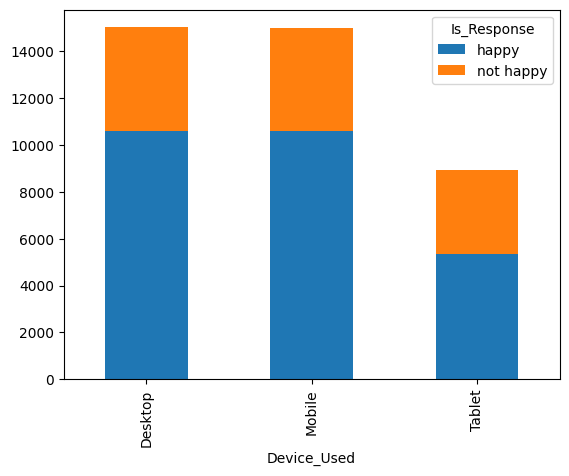

In [34]:
train.groupby(['Device_Used', 'Is_Response']).size().unstack().plot(kind='bar', stacked=True)

In [38]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

train['Clean_Description'] = train['Description'].apply(clean_text)
test['Clean_Description'] = test['Description'].apply(clean_text)


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Label'] = label_encoder.fit_transform(train['Is_Response'])  # happy=1, not happy=0


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf.fit_transform(train['Clean_Description'])
X_test = tfidf.transform(test['Clean_Description'])



In [53]:
from sklearn.naive_bayes import MultinomialNB

y_train = train['Label']

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [54]:
test['Predicted_Label'] = model.predict(X_test)
test['Predicted_Response'] = label_encoder.inverse_transform(test['Predicted_Label'])


In [55]:
test[['User_ID', 'Description', 'Predicted_Response']].head()


,User_ID,Description,Predicted_Response
0,id80132,Looking for a motel in close proximity to TV t...,not happy
1,id80133,Walking distance to Madison Square Garden and ...,happy
2,id80134,Visited Seattle on business. Spent - nights in...,happy
3,id80135,This hotel location is excellent and the rooms...,not happy
4,id80136,This hotel is awesome I love the service Antho...,happy


In [56]:
test.to_csv("test_with_predictions.csv", index=False)


In [57]:
test

,User_ID,Description,Browser_Used,Device_Used,Clean_Description,Predicted_Label,Predicted_Response,has_in,has_was,has_to,has_and,has_the,has_we,Top_Happy_Word,Top_NotHappy_Word
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,looking for a motel in close proximity to tv t...,1,not happy,1,1,1,1,1,1,in,we
1,id80133,Walking distance to Madison Square Garden and ...,Internet Explorer,Desktop,walking distance to madison square garden and ...,0,happy,1,1,1,1,1,1,in,we
2,id80134,Visited Seattle on business. Spent - nights in...,Internet Explorer,Tablet,visited seattle on business spent nights in th...,0,happy,1,1,1,1,1,0,in,was
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,this hotel location is excellent and the rooms...,1,not happy,1,1,1,1,1,1,in,we
4,id80136,This hotel is awesome I love the service Antho...,Firefox,Mobile,this hotel is awesome i love the service antho...,0,happy,0,0,1,1,1,0,to,to
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Google Chrome,Mobile,i stayed at the hotel and towers for a confere...,0,happy,0,1,1,1,1,0,was,was
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet,trying to stay within the marriott family and ...,0,happy,1,1,1,1,1,1,in,we
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop,we stayed for nights with our little dogvery f...,0,happy,1,1,1,1,1,1,in,we
29402,id109534,Stayed at the Yotel over the weekend and was v...,Internet Explorer,Desktop,stayed at the yotel over the weekend and was v...,0,happy,0,1,1,1,1,0,was,was


In [58]:
# Get feature names
feature_names = tfidf.get_feature_names_out()

# Get top 5 words for each class
top_words_happy = np.argsort(model.feature_log_prob_[1])[-5:]  # Class 1 = 'happy'
top_words_not_happy = np.argsort(model.feature_log_prob_[0])[-5:]  # Class 0 = 'not happy'

# Convert to actual words
top_happy_words = [feature_names[i] for i in top_words_happy]
top_not_happy_words = [feature_names[i] for i in top_words_not_happy]

print("😊 Top words for 'happy':", top_happy_words)
print("💔 Top words for 'not happy':", top_not_happy_words)


😊 Top words for 'happy': ['stay', 'rooms', 'night', 'hotel', 'room']
💔 Top words for 'not happy': ['stay', 'staff', 'great', 'room', 'hotel']


In [59]:
for word in top_happy_words + top_not_happy_words:
    test[f'has_{word}'] = test['Clean_Description'].apply(lambda x: 1 if word in x.split() else 0)


In [60]:
def get_top_word_presence(text, top_words):
    for word in top_words:
        if word in text.split():
            return word
    return None

test['Top_Happy_Word'] = test['Clean_Description'].apply(lambda x: get_top_word_presence(x, top_happy_words))
test['Top_NotHappy_Word'] = test['Clean_Description'].apply(lambda x: get_top_word_presence(x, top_not_happy_words))


In [61]:
test

,User_ID,Description,Browser_Used,Device_Used,Clean_Description,Predicted_Label,Predicted_Response,has_in,has_was,has_to,...,has_we,Top_Happy_Word,Top_NotHappy_Word,has_stay,has_rooms,has_night,has_hotel,has_room,has_staff,has_great
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,looking for a motel in close proximity to tv t...,1,not happy,1,1,1,...,1,room,room,0,0,0,0,1,0,0
1,id80133,Walking distance to Madison Square Garden and ...,Internet Explorer,Desktop,walking distance to madison square garden and ...,0,happy,1,1,1,...,1,hotel,staff,0,0,0,1,1,1,0
2,id80134,Visited Seattle on business. Spent - nights in...,Internet Explorer,Tablet,visited seattle on business spent nights in th...,0,happy,1,1,1,...,0,night,great,0,0,1,0,1,0,1
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,this hotel location is excellent and the rooms...,1,not happy,1,1,1,...,1,stay,stay,1,1,0,1,0,1,0
4,id80136,This hotel is awesome I love the service Antho...,Firefox,Mobile,this hotel is awesome i love the service antho...,0,happy,0,0,1,...,0,hotel,great,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Google Chrome,Mobile,i stayed at the hotel and towers for a confere...,0,happy,0,1,1,...,0,stay,stay,1,1,0,1,0,0,0
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet,trying to stay within the marriott family and ...,0,happy,1,1,1,...,1,stay,stay,1,1,1,0,1,0,0
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop,we stayed for nights with our little dogvery f...,0,happy,1,1,1,...,1,stay,stay,1,0,0,0,1,1,0
29402,id109534,Stayed at the Yotel over the weekend and was v...,Internet Explorer,Desktop,stayed at the yotel over the weekend and was v...,0,happy,0,1,1,...,0,None,None,0,0,0,0,0,0,0


In [62]:
# Combine and deduplicate top words
top_words = list(set(top_happy_words + top_not_happy_words))


In [63]:
for word in top_words:
    test[f'has_{word}'] = test['Clean_Description'].apply(lambda x: int(word in x.split()))


In [64]:
# Sum the presence of each word
word_counts = pd.DataFrame({
    word: test[f'has_{word}'].sum() for word in top_words
}, index=['Count']).T

# Sort to look prettier
word_counts = word_counts.sort_values('Count', ascending=False)


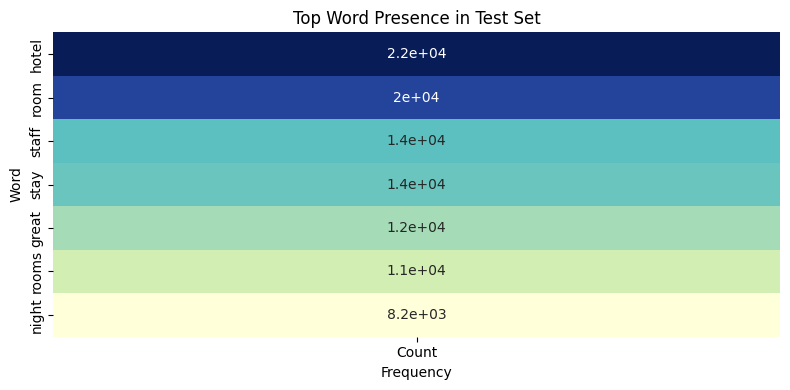

In [65]:

plt.figure(figsize=(8, 4))
sns.heatmap(word_counts, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Top Word Presence in Test Set")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


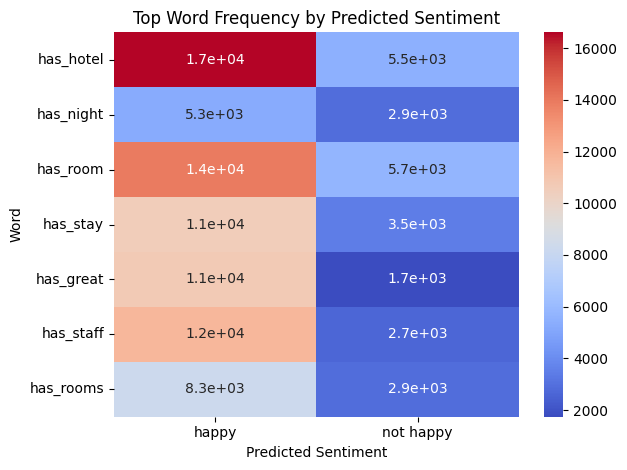

In [66]:
heatmap_data = test.groupby('Predicted_Response')[
    [f'has_{w}' for w in top_words]
].sum().T

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Top Word Frequency by Predicted Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [67]:
def show_examples(word, sentiment='happy', n=5):
    filtered = test[
        (test[f'has_{word}'] == 1) & 
        (test['Predicted_Response'] == sentiment)
    ]
    return filtered[['Description', 'Predicted_Response']].head(n)

# Example: show 5 "happy" descriptions that include "hotel"
show_examples('hotel', sentiment='happy', n=5)


,Description,Predicted_Response
1,Walking distance to Madison Square Garden and ...,happy
4,This hotel is awesome I love the service Antho...,happy
6,What a pleasant place to stay!\nThe hotel is b...,happy
9,Hotel Sorella for my birthday. I absolutely lo...,happy
11,"This hotel is a keeper! First, you get a full ...",happy


In [68]:
bias_table = test.groupby('Predicted_Response')[
    [f'has_{w}' for w in top_words]
].sum().T

bias_table['bias_toward_happy'] = bias_table['happy'] / (bias_table['happy'] + bias_table['not happy'])

bias_table = bias_table.sort_values('bias_toward_happy', ascending=False)
bias_table


Predicted_Response,happy,not happy,bias_toward_happy
has_great,10730,1740,0.860465
has_staff,11704,2659,0.814872
has_stay,10554,3458,0.753212
has_hotel,16614,5484,0.751833
has_rooms,8280,2868,0.742734
has_room,13931,5718,0.708993
has_night,5269,2885,0.646186


In [69]:
def get_word_snippets(word, sentiment='happy', n=5):
    rows = test[
        (test[f'has_{word}'] == 1) & 
        (test['Predicted_Response'] == sentiment)
    ]
    return [desc for desc in rows['Description'].head(n)]


In [70]:
for word in ['great', 'staff', 'stay']:
    print(f"\n--- Descriptions with the word '{word}' and predicted as 'happy' ---")
    examples = get_word_snippets(word, sentiment='happy', n=3)
    for i, desc in enumerate(examples, 1):
        print(f"{i}. {desc}\n")



--- Descriptions with the word 'great' and predicted as 'happy' ---
1. Visited Seattle on business. Spent - nights in the Vintage Park. Great location. Room was nice. Bathroom was nice and clean. Thermostat didn't work-had to open the windows to cool the room off. Upon check-in, they asked if I wanted turn-down service. I said yes. Never happened. Asked front desk for a local Seattle restaurant on my first night. She suggested two cookie-cutter wine bars and a mall restaurant. Not a big deal, but as I became familiar with downtown Seattle, I couldn't believe she didn't recommend The Brooklyn or one of the many other restaurants with true local flavor. Joined the Kimpton loyalty club upon arriving. Was supposed to get the WSJ. Never even received USA Today. But I did get free internet, which saved me some money. No pool. I knew this before I made the reservation, but it was not immediately clear--had to do some searching.

2. This hotel is awesome I love the service Anthony is really a

In [71]:
bias_table_sorted_negative = bias_table.sort_values('bias_toward_happy', ascending=True)
bias_table_sorted_negative


Predicted_Response,happy,not happy,bias_toward_happy
has_night,5269,2885,0.646186
has_room,13931,5718,0.708993
has_rooms,8280,2868,0.742734
has_hotel,16614,5484,0.751833
has_stay,10554,3458,0.753212
has_staff,11704,2659,0.814872
has_great,10730,1740,0.860465


In [72]:
for word in ['night', 'room', 'hotel']:  # You can swap in the most negative words
    print(f"\n--- Descriptions with the word '{word}' and predicted as 'not happy' ---")
    examples = get_word_snippets(word, sentiment='not happy', n=3)
    for i, desc in enumerate(examples, 1):
        print(f"{i}. {desc}\n")



--- Descriptions with the word 'night' and predicted as 'not happy' ---
1. This is - min away from Times Square, Central Park, Broadway, so very good location. I got the room through one of the discount sites, don't know if the staff knows and treats us accordingly, I'll come back to that. Room included continental breakfast, it was excellent - fresh pastries, good orange juice and coffee, fruit salad, bagels. You could also pay for """"""""""""""""""""""""""""""""a la carte"""""""""""""""""""""""""""""""" if you wanted a hot breakfast. There was also free coffee early in the morning. I used the business office every day, good internet access, free printing, that was nice.
We had a room with a king bed, there was - of us, so I asked for a rollaway bed, $--- night. Much more expensive than anywhere else I have been in the States, but perhaps that's the going price in New York. What I considered a ripoff however was the $--- day we had to pay for internet, when these days most places no